In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from opensignalsreader import OpenSignalsReader
import os

Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-1_baseline.txt
ECG Signal (First 5 values): [0.97305 0.9711  0.9711  0.97305 0.97305]
EDA Signal (First 5 values): [14.9753 14.9753 14.9753 14.9753 14.9753]


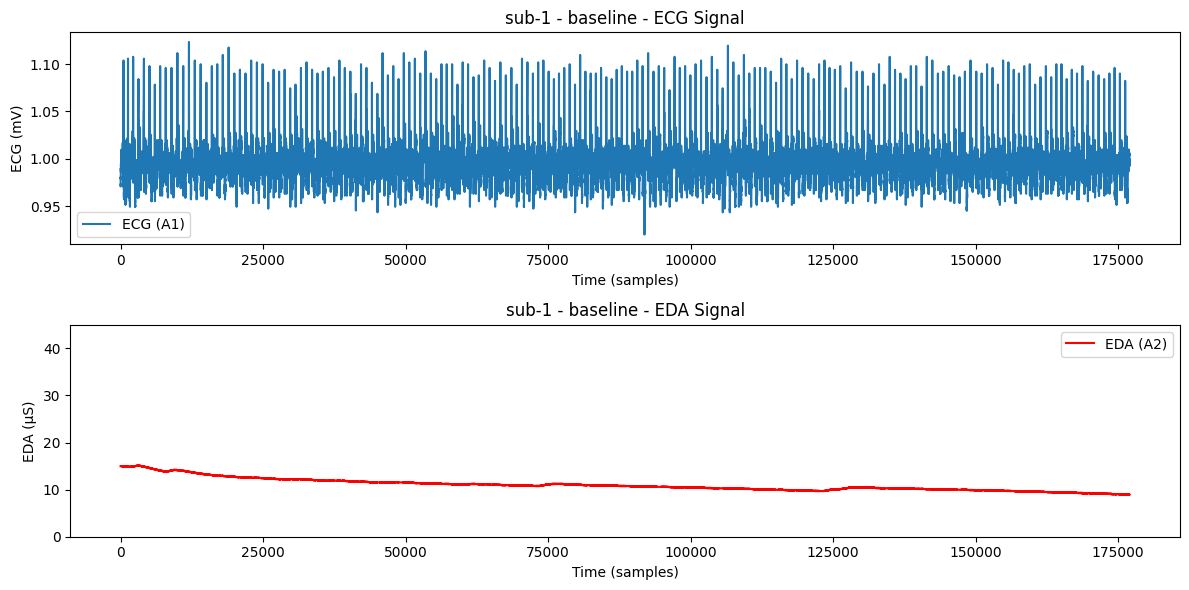

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-1_baseline_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-1_baseline_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-1_spiderhand.txt
ECG Signal (First 5 values): [0.99645 0.9984  0.9984  0.9984  0.9984 ]
EDA Signal (First 5 values): [29.8724 29.8724 29.8724 29.8724 29.8724]


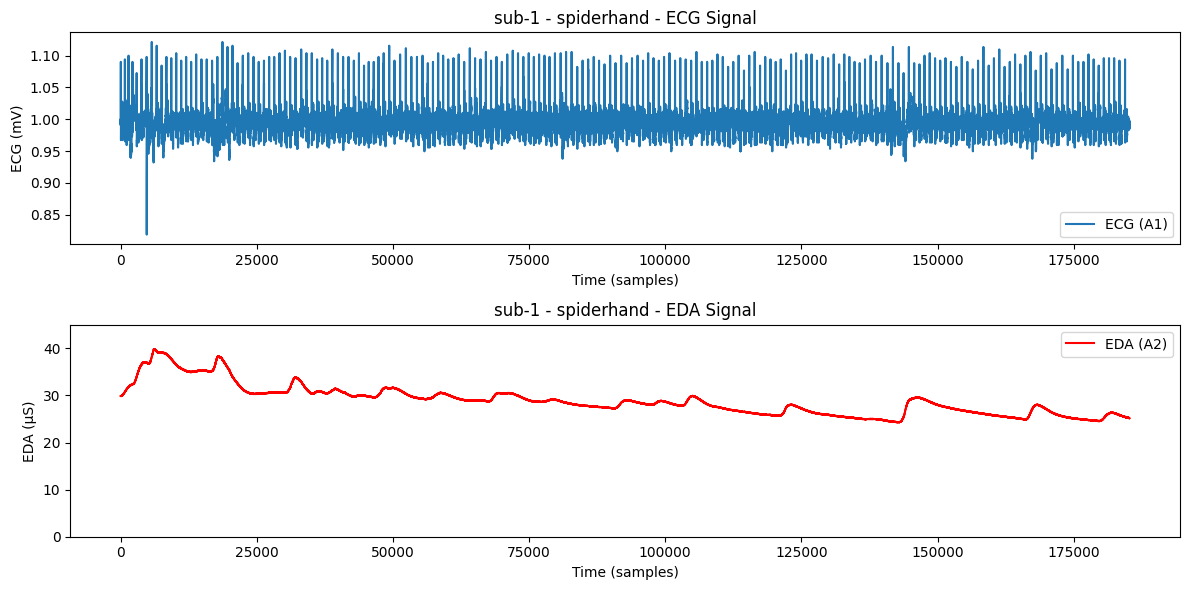

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-1_spiderhand_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-1_spiderhand_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-1_spidervideo.txt
ECG Signal (First 5 values): [1.01985 1.01985 1.01985 1.01985 1.01985]
EDA Signal (First 5 values): [23.8901 23.8901 23.8901 23.8901 23.8901]


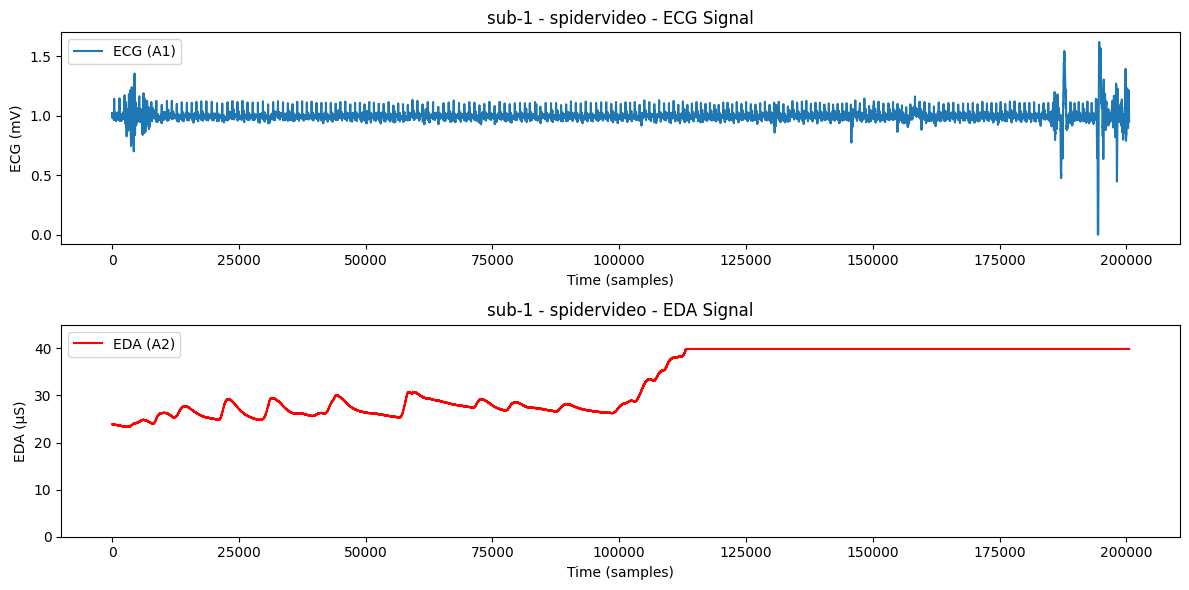

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-1_spidervideo_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-1_spidervideo_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-2_baseline.txt
ECG Signal (First 5 values): [1.0179  1.014   1.0101  1.00425 1.00035]
EDA Signal (First 5 values): [24.3593 24.3593 24.3593 24.3593 24.3593]


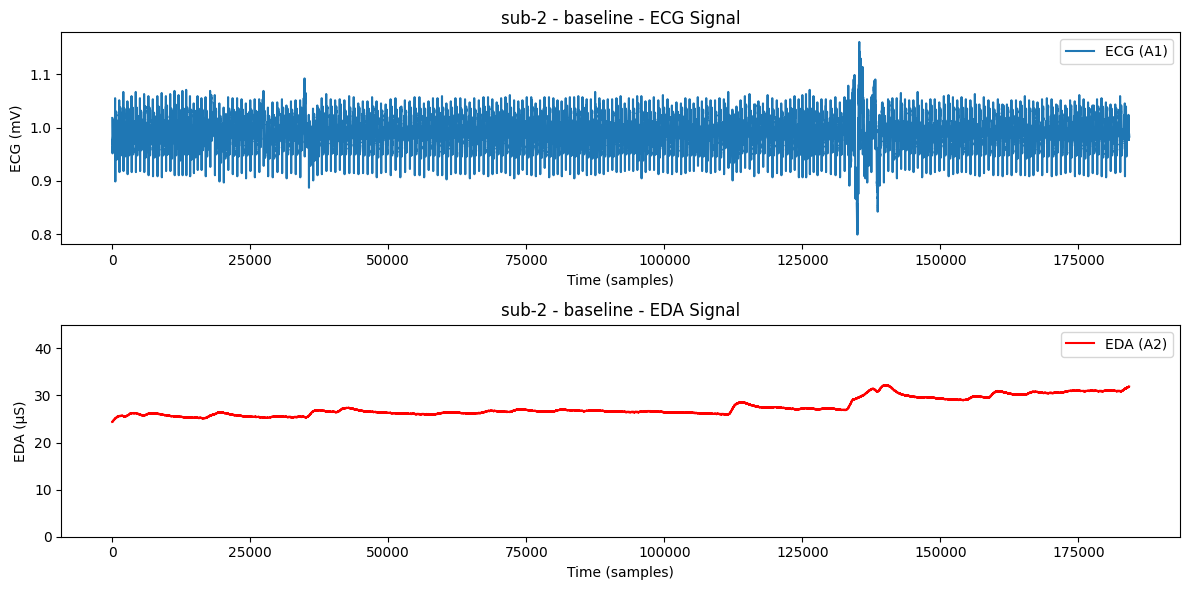

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-2_baseline_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-2_baseline_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-2_spiderhand.txt
ECG Signal (First 5 values): [0.9789  0.9789  0.97695 0.97695 0.98085]
EDA Signal (First 5 values): [39.882 39.882 39.882 39.882 39.882]


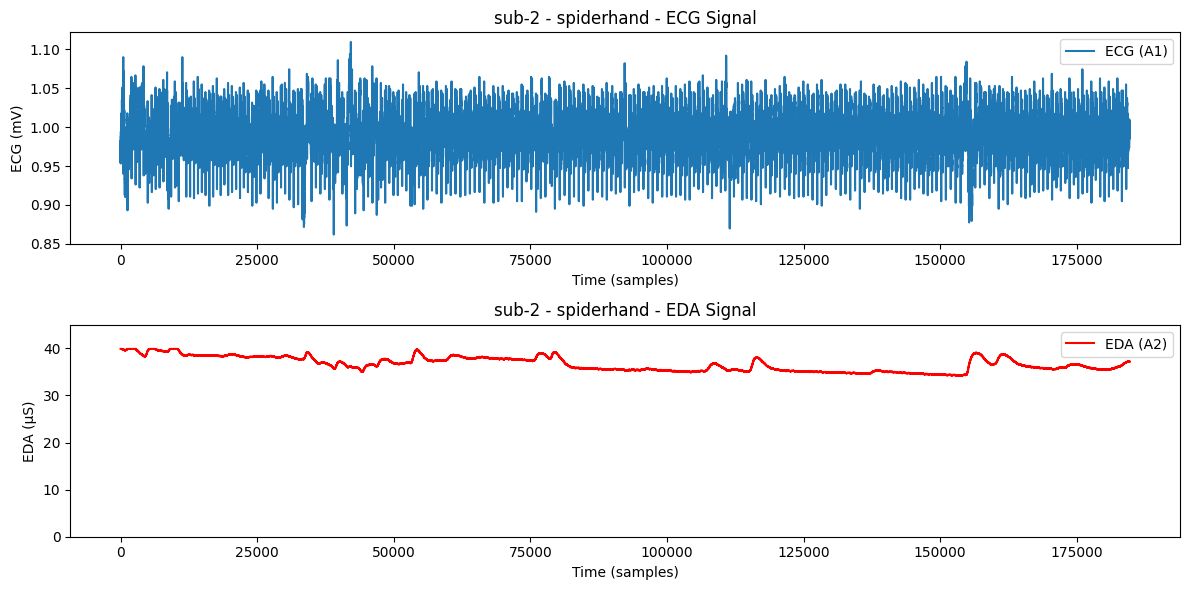

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-2_spiderhand_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-2_spiderhand_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-2_spidervideo.txt
ECG Signal (First 5 values): [1.05885 1.05885 1.05495 1.04715 1.04715]
EDA Signal (First 5 values): [38.709  38.709  38.709  38.6699 38.709 ]


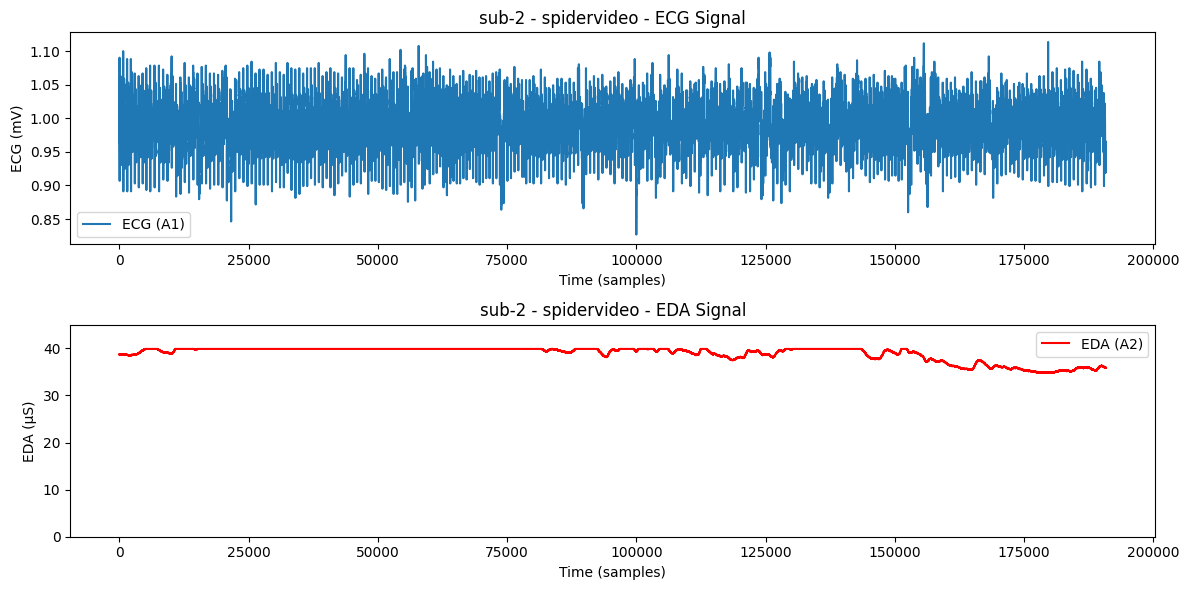

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-2_spidervideo_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-2_spidervideo_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-3_baseline.txt
ECG Signal (First 5 values): [0.97695 0.9789  0.98085 0.98085 0.9828 ]
EDA Signal (First 5 values): [32.062  32.0229 32.062  32.062  32.062 ]


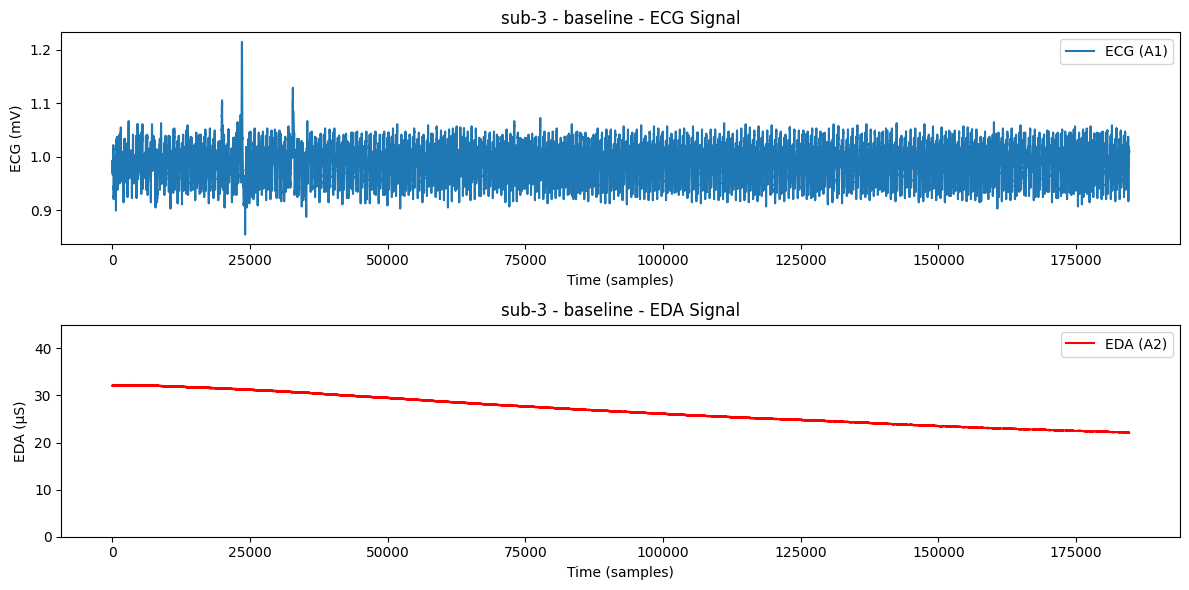

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-3_baseline_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-3_baseline_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-3_spiderhand.txt
ECG Signal (First 5 values): [0.9984 0.9984 0.9984 0.9984 0.9984]
EDA Signal (First 5 values): [38.9045 38.9045 38.9045 38.9045 38.9045]


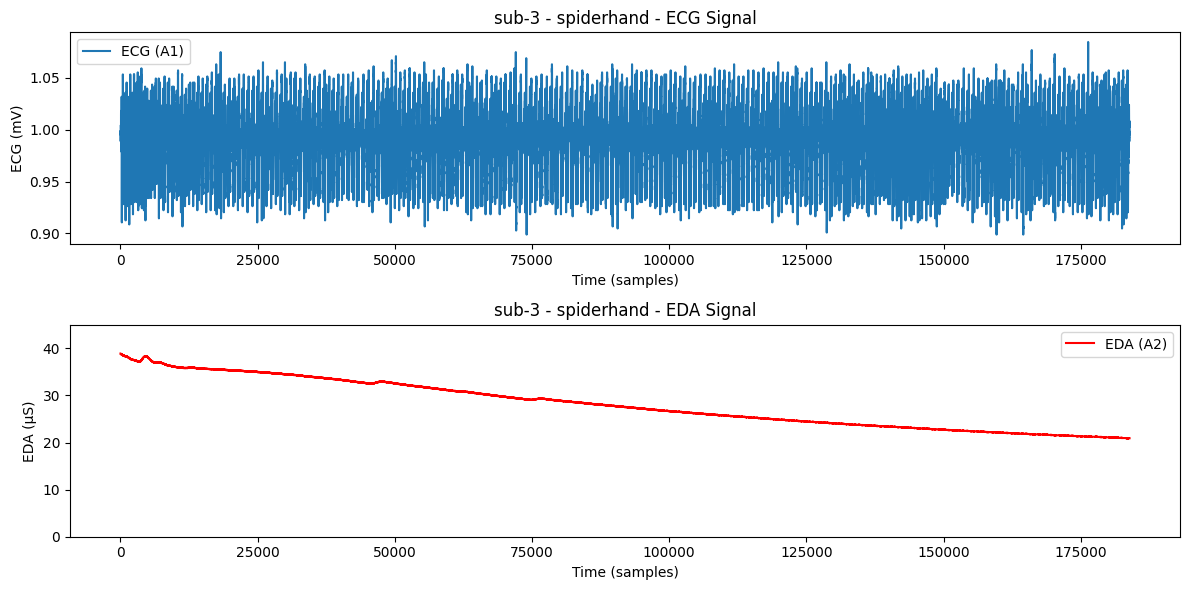

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-3_spiderhand_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-3_spiderhand_eda.csv
Processing: /Users/erwin/Documents/ProjectPsychophysiologyData/source-data/sub-3_spidervideo.txt
ECG Signal (First 5 values): [0.9984  0.9984  0.9945  0.99255 0.99645]
EDA Signal (First 5 values): [33.1568 33.1568 33.1568 33.1568 33.1568]


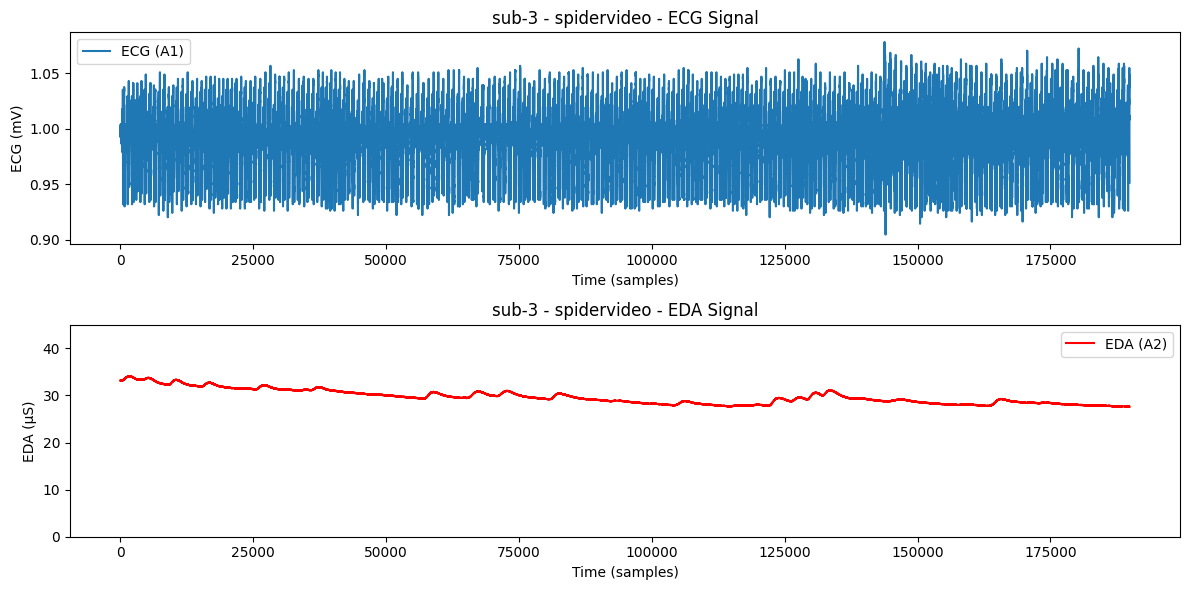

Saved ECG signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-3_spidervideo_ecg.csv
Saved EDA signal to /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/sub-3_spidervideo_eda.csv


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
sourceDataFolder = '/Users/erwin/Documents/ProjectPsychophysiologyData/source-data'
rawDataFolder = '/Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/'
participants = ['sub-1', 'sub-2', 'sub-3']
tasks = ['baseline', 'spiderhand', 'spidervideo']

# Ensure output directory exists
if not os.path.exists(rawDataFolder):
    os.makedirs(rawDataFolder)

# Loop through participants and tasks
for pi in participants:
    for ti in tasks:
        filename = os.path.join(sourceDataFolder, f"{pi}_{ti}.txt")
        print(f"Processing: {filename}")

        if not os.path.exists(filename):
            print(f"File not found: {filename}")
            continue

        try:
            # Read the file and skip the header
            with open(filename, 'r') as f:
                # Skip header lines (assuming they start with '#')
                header_lines = []
                line = f.readline()
                while line.startswith('#'):
                    header_lines.append(line.strip())
                    line = f.readline()

                # Now read the data into a NumPy array
                data = np.loadtxt([line] + f.readlines())

            # Extract ECG (A1) and EDA (A2) signals
            ecg_signal_raw = data[:, 5]  # Column index for A1 (ECG)
            eda_signal_raw = data[:, 6]  # Column index for A2 (EDA)

            # Scaling for ECG (A1) and EDA (A2) based on 10-bit resolution
            # ECG scaling: approximately 0.00195 mV per ADC unit
            ecg_signal = ecg_signal_raw * 0.00195  # Scale to mV (millivolts)

            # EDA scaling: approximately 0.0391 µS per ADC unit
            eda_signal = eda_signal_raw * 0.0391  # Scale to µS (microsiemens)

            # Print the first 5 values for verification
            print(f"ECG Signal (First 5 values): {ecg_signal[:5]}")
            print(f"EDA Signal (First 5 values): {eda_signal[:5]}")

            # Plot ECG and EDA signals
            plt.figure(figsize=(12, 6))

            # Plot ECG
            plt.subplot(2, 1, 1)
            plt.plot(ecg_signal, label='ECG (A1)')
            plt.title(f"{pi} - {ti} - ECG Signal")
            plt.xlabel('Time (samples)')
            plt.ylabel('ECG (mV)')
            plt.legend()

            # Plot EDA
            plt.subplot(2, 1, 2)
            plt.plot(eda_signal, label='EDA (A2)', color='red')
            plt.title(f"{pi} - {ti} - EDA Signal")
            plt.xlabel('Time (samples)')
            plt.ylabel('EDA (µS)')
            plt.legend()

            # Set the y-axis range for EDA (for sanity check, you can limit it to 0-40 µS)
            plt.subplot(2, 1, 2)
            plt.ylim(0, 45)  # Limit EDA to 40 µS max

            # Show the plots
            plt.tight_layout()
            plt.show()

            # Save the signals to CSV files
            output_filename_ecg = os.path.join(rawDataFolder, f"{pi}_{ti}_ecg.csv")
            output_filename_eda = os.path.join(rawDataFolder, f"{pi}_{ti}_eda.csv")

            np.savetxt(output_filename_ecg, ecg_signal, delimiter=',', header='ECG', comments='')
            np.savetxt(output_filename_eda, eda_signal, delimiter=',', header='EDA', comments='')
            print(f"Saved ECG signal to {output_filename_ecg}")
            print(f"Saved EDA signal to {output_filename_eda}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")
